## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

## Loading the data

In [2]:
test_data = pd.read_csv("test_Loan_Prediction_Problem_Dataset.csv")
train_data = pd.read_csv("train_Loan_Prediction_Problem_Dataset.csv")

## Checking the data for types, sizes, number of columns etc.

In [3]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Checking for NaNs

In [6]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train_data.dropna(how="any", inplace=True)

## Checking for duplicates

In [8]:
train_data.duplicated().sum()

0

In [9]:
train_data.shape

(480, 13)

## Quick visualisations to better understand the data

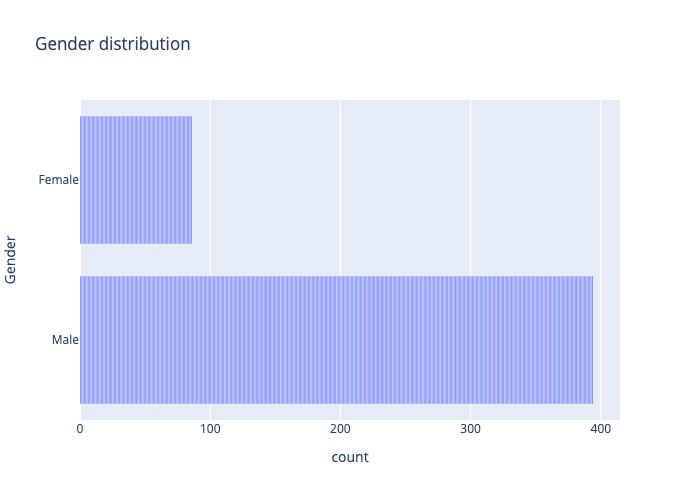

In [10]:
_ = px.bar(train_data, y="Gender", title="Gender distribution")
_.show()

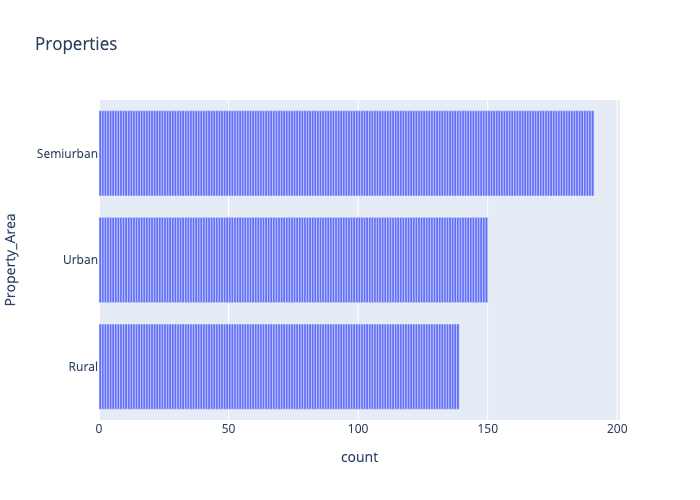

In [11]:
_ = px.bar(train_data, y="Property_Area", title="Properties")
_.show()

In [12]:
pd.crosstab(train_data["Education"],train_data["Loan_Status"], normalize="index")*100

Loan_Status,N,Y
Education,,
Graduate,29.242820,70.757180
Not Graduate,37.113402,62.886598


In [13]:
pd.crosstab(train_data["Married"],train_data["Loan_Status"], normalize="index")*100

Loan_Status,N,Y
Married,,
No,37.869822,62.130178
Yes,27.009646,72.990354


In [14]:
pd.crosstab(train_data["Gender"],train_data["Loan_Status"], normalize="index")*100

Loan_Status,N,Y
Gender,,
Female,37.209302,62.790698
Male,29.441624,70.558376
